Logging Setup!


INFO:calendar_ipynb.google_oauth:Saving credentials to /home/fahimalizain/projects/calendar-ipynb/temp/fahimalizain@gmail.com-google-token.pickle
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:calendar_ipynb.google_oauth:Saving credentials to /home/fahimalizain/projects/calendar-ipynb/temp/fahim.zain@kwalee.com-google-token.pickle
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:calendar_ipynb.events_incremental:Sync completed for fahimalizain@gmail.co

Total Events Fetched: 60
Total Hrs: 23.983333333333334


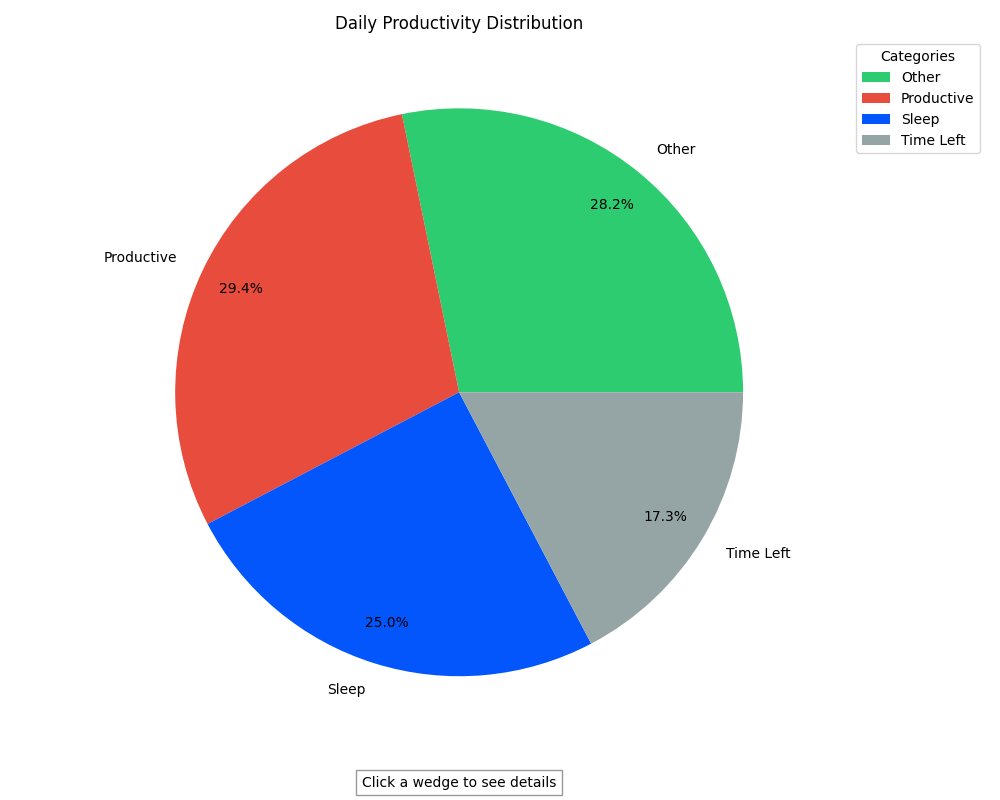

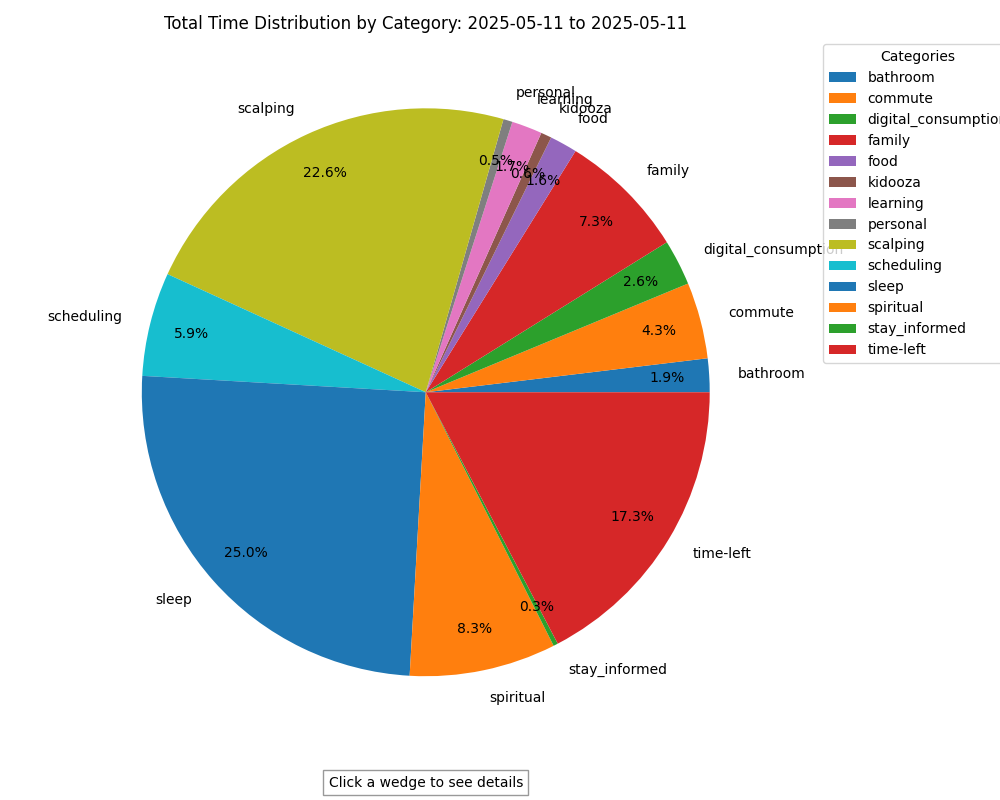

In [1]:
# Run the main notebook. Output is collapsed by default.
events = []
# %run main.ipynb
%run today.ipynb

In [2]:
# This cell is to debug the sleep calculation logic
import datetime
from calendar_ipynb.events import pretty_print_timedelta


def get_events_for_date(date_str: str):
    global events
    _date = datetime.datetime.fromisoformat(f"{date_str}T00:00:00+05:30")
    filtered_events = [
        event for event in events
        if datetime.datetime.fromisoformat(event["start"]["dateTime"]) >= _date
        and datetime.datetime.fromisoformat(event["start"]["dateTime"]).date() <= _date.date()
    ]
    
    return filtered_events

def pretty_print_events(title: str, events: list):
    print(title)
    for event in events:
        time_str = ""
        start_datetime = datetime.datetime.fromisoformat(event["start"]["dateTime"])
        end_datetime = datetime.datetime.fromisoformat(event["end"]["dateTime"])

        time_str += f"{start_datetime.strftime('%H:%M')} - {end_datetime.strftime('%H:%M')}"
        time_str += f" / {pretty_print_timedelta(end_datetime - start_datetime)} / {event['duration_min']}"   # {end_datetime.date().strftime('%d %b')}

        print(" ", time_str, " | ", event['summary'])

def summarize_sleep(date_str: str):
    global events
    filtered_events = get_events_for_date(date_str)

    if not len(filtered_events):
        print("No events found for this date")
        return

    sleep_events = [
        event for event in filtered_events
        if any(x[0] == "sleep" for x in event["categories"])
    ]

    pretty_print_events(f"Sleep Events on {date_str}", sleep_events)

    sleep_total_min = sum(x["duration_min"] for x in sleep_events)
    tdelta = datetime.timedelta(minutes=sleep_total_min)
    print("Total Sleep:", pretty_print_timedelta(tdelta), "\n\n")

# for i in range(6, -1, -1):   
#     dt = (datetime.datetime.now() + datetime.timedelta(days=-1 * i)).date().isoformat()
#     pretty_print_events("Events on " + dt, get_events_for_date(dt)) 
# summarize_sleep(date_str="2025-03-19")
dt = "2025-05-11"
pretty_print_events("Events on " + dt, get_events_for_date(dt)) 

Events on 2025-05-11
  00:00 - 05:30 / 5h 30m / 330.0  |  Sleeping
  05:30 - 05:45 / 15m / 15.0  |  Woke Up
  05:45 - 05:55 / 10m / 5.0  |  Twitter | Social Media
  05:45 - 05:55 / 10m / 5.0  |  Fresh Up
  05:55 - 06:05 / 10m / 10.0  |  Prayer: Subah
  06:05 - 06:50 / 45m / 45.0  |  FSK | Family
  06:50 - 07:15 / 25m / 25.0  |  Twitter | Social Media
  07:15 - 07:30 / 15m / 7.5  |  Twitter | Social Media
  07:15 - 07:30 / 15m / 7.5  |  Bathroom
  07:30 - 07:40 / 10m / 10.0  |  Fresh Up
  07:40 - 07:55 / 15m / 15.0  |  Breakfast
  07:55 - 08:15 / 20m / 20.0  |  Kizhisseri to Kondotty | Commute
  08:15 - 08:45 / 30m / 8.75  |  DSM | Kidooza
  08:15 - 08:30 / 15m / 5.0  |  Book CRLM to CLT Train Ticket
  08:15 - 08:30 / 15m / 5.0  |  Change IRCTC Boarding Point | Commute
  08:30 - 08:45 / 15m / 3.75  |  TENETS Reminder!
  08:30 - 08:45 / 15m / 3.75  |  Check Emails
  08:30 - 08:45 / 15m / 3.75  |  Personal Finance
  08:45 - 09:10 / 25m / 25.0  |  Quran Tafseer / Juz' 23 / Quarter-4
  09:1